In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('bank-full.csv', sep=';')
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


## Exercício 1

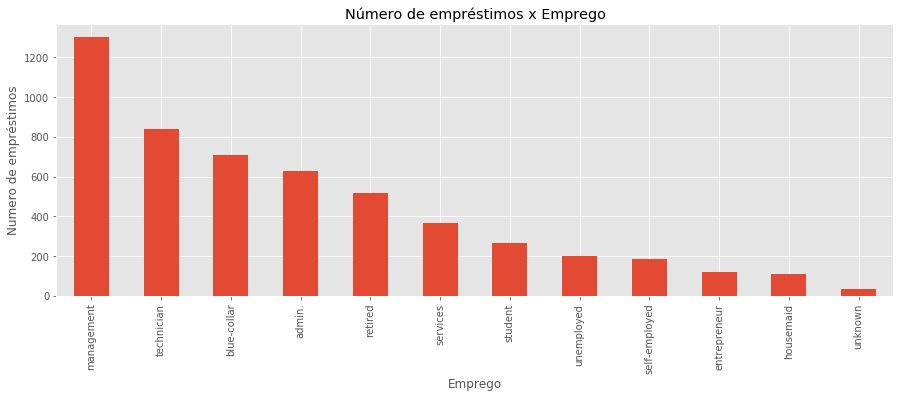

Numero de emprestimos 'default' para gerentes: 8
Numero de emprestimos 'housing' para gerentes: 431
Numero de emprestimos 'loan' para gerentes: 92


In [4]:
ex1_df = df[df['y'] == 'yes'].groupby(df['job'])
N = 12
ex1_df['job'].count().nlargest(N).plot.bar(figsize=(15, 5))
plt.grid(True)
plt.ylabel("Numero de empréstimos")
plt.xlabel("Emprego")
plt.title("Número de empréstimos x Emprego")
plt.show()

print("Numero de emprestimos 'default' para gerentes:", 
      len(df[(df['y'] == 'yes') & (df['job'] == 'management') & (df['default'] == 'yes')]))
print("Numero de emprestimos 'housing' para gerentes:", 
      len(df[(df['y'] == 'yes') & (df['job'] == 'management') & (df['housing'] == 'yes')]))
print("Numero de emprestimos 'loan' para gerentes:", 
      len(df[(df['y'] == 'yes') & (df['job'] == 'management') & (df['loan'] == 'yes')]))


Como é possível observar, a profissão gerente (do inglês, management), é a que possui o maior número de empréstimos, portanto, possui a maior tendência a fazer empréstimos. Além disso, ao contar cada tipo de empréstimo para os gerentes, observa-se que o imobiliário obteve a maior ocorrência.

## Exercício 2

Contando-se o número de empréstimos aceitos em relação ao número de contatos:

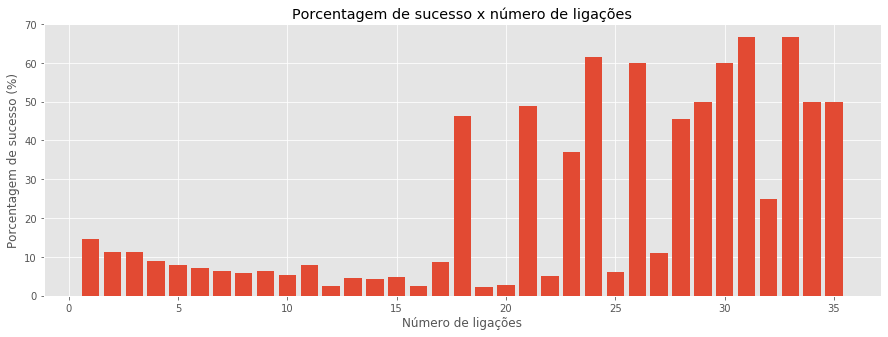

Numero de ligações com maior taxa de sucesso: 31 com uma taxa de 66.67%
Taxa de sucesso no intervalo entre 28 e 35 ligações: 51.97%


In [17]:
ex2_df = df.groupby(['campaign'])
counts = ex2_df['y'].value_counts()
# pct_sucess = number_of_yes / (number_of_no + number_of_yes)
pct_sucess = np.array(np.array(counts)[1::2]*100 / (np.array(counts)[::2] + np.array(counts)[1::2]))
x = range(1, len(pct_sucess)+1)
plt.figure(figsize=(15, 5))
plt.bar(x=x, height=pct_sucess)
plt.title('Porcentagem de sucesso x número de ligações')
plt.xlabel('Número de ligações')
plt.ylabel('Porcentagem de sucesso (%)')
plt.show()
print("Numero de ligações com maior taxa de sucesso:", np.argmax(pct_sucess)+1, "com uma taxa de {:.2f}%".format(max(pct_sucess)))
interval_mean_sucess = sum(pct_sucess[27:34])/len(pct_sucess[27:34])
print("Taxa de sucesso no intervalo entre 28 e 35 ligações: {:.2f}%".format(interval_mean_sucess))


Analisando a figura, nota-se que, entre 28 e 35 ligações, obteve-se uma boa taxa de sucesso (com exceção de 32 ligações, que gerou uma taxa baixa). Dessa forma, percebe-se que poucas ligações são pouco efetivas e que entre 28 e 35 ligações pode-se obter uma taxa de sucesso maior e mais confiável, dado que os dados razoavelmente consistentes nesse intervalo.

## Exercício 3

Com base no exercício 2, o número médio de ligações recomendadas seria a média de ligações no intervalo entre 28 e 35, que, arredondada para baixo, seria 31 ligações, com número máximo de 35, pois não se conhece o comportamento dos dados após este intervalo.

## Exercício 4

In [28]:
df['y_numeric'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
display(df.corrwith(df['previous']))

mod = sm.OLS(df['y_numeric'],df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']])

fii = mod.fit()

display(fii.summary())

age          0.001288
balance      0.016674
day         -0.051710
duration     0.001203
campaign    -0.032855
pdays        0.454820
previous     1.000000
y_numeric    0.093236
dtype: float64

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              y_numeric   R-squared (uncentered):                   0.268
Model:                            OLS   Adj. R-squared (uncentered):              0.268
Method:                 Least Squares   F-statistic:                              2368.
Date:                Wed, 27 Nov 2019   Prob (F-statistic):                        0.00
Time:                        15:08:41   Log-Likelihood:                         -8584.3
No. Observations:               45211   AIC:                                  1.718e+04
Df Residuals:                   45204   BIC:                                  1.724e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age        -9.445e-05   7.28e-05     -1.298      0.194      -0.000    4.82e-05
balance     4.225e-06   4.54e-07      9.300      0.000    3.33e-06    5.12e-06
day           -0.0006      0.000     -3.849      0.000      -0.001      -0.000
duration       0.0005    5.2e-06     91.852      0.000       0.000       0.000
campaign      -0.0037      0.000     -8.340      0.000      -0.005      -0.003
pdays          0.0002   1.54e-05     14.823      0.000       0.000       0.000
previous       0.0078      0.001     11.649      0.000       0.007       0.009
==============================================================================
Omnibus:                    16182.473   Durbin-Watson:                   1.528
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            52880.845
Skew:                           1.859   Prob(JB):                         0.00
Kurtosis:                       6.774   Cond. No.                     1.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Ao analisar a correlação entre as variáveis com o sucesso da campanha atual, notou-se que a campanha anterior possui correlação diferente de zero, logo, influencia na campanha atual. Além disso, ao analisar os coeficientes da regressão linear usada para prever o sucesso da campanha atual ('y'), percebeu-se que o coeficiente 'previous' (campanha anterior), possui um p-valor menor que 0.05, sendo, dessa forma, relevante para a campanha atual.

## Exercício 5

Analisando a correlação entre os campos e o sucesso da campanha:

In [42]:
df['y_numeric'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
df['loan_numeric'] = df['loan'].apply(lambda x: 1 if x == 'yes' else 0)
df['housing_numeric'] = df['housing'].apply(lambda x: 1 if x == 'yes' else 0)
df['default_numeric'] = df['default'].apply(lambda x: 1 if x == 'yes' else 0)
correlations = df.drop(columns=['y_numeric']).corrwith(df['y_numeric'])
display(correlations)
print("Correlação máxima:", correlations.abs().max())
correlations = df.drop(columns=['y_numeric', 'duration']).corrwith(df['y_numeric'])
print("Correlação máxima:", correlations.abs().max())

age                0.025155
balance            0.052838
day               -0.028348
duration           0.394521
campaign          -0.073172
pdays              0.103621
previous           0.093236
loan_numeric      -0.068185
housing_numeric   -0.139173
default_numeric   -0.022419
dtype: float64

Correlação máxima: 0.3945210158945624
Correlação máxima: 0.13917270249816996


Ao observar as correlações, nota-se que a duração da campanha é a variável com maior influência no sucesso da campanha. Entretanto, tal campo pode ser desconsiderado para uma análise realista, segundo a fonte oficial do dataset, assim, o empréstimo imobiliário (campo 'housing') é o fator determinante para que o banco exija um seguro de crédito.

## Exercício 6

C:\Users\felipe.garcia\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,age,job,marital,education,default,balance,loan
0,58,4,1,2,0,2143,0
1,44,9,2,1,0,29,0
2,33,2,1,1,0,2,1
3,47,1,1,3,0,1506,0
4,33,11,2,3,0,1,0


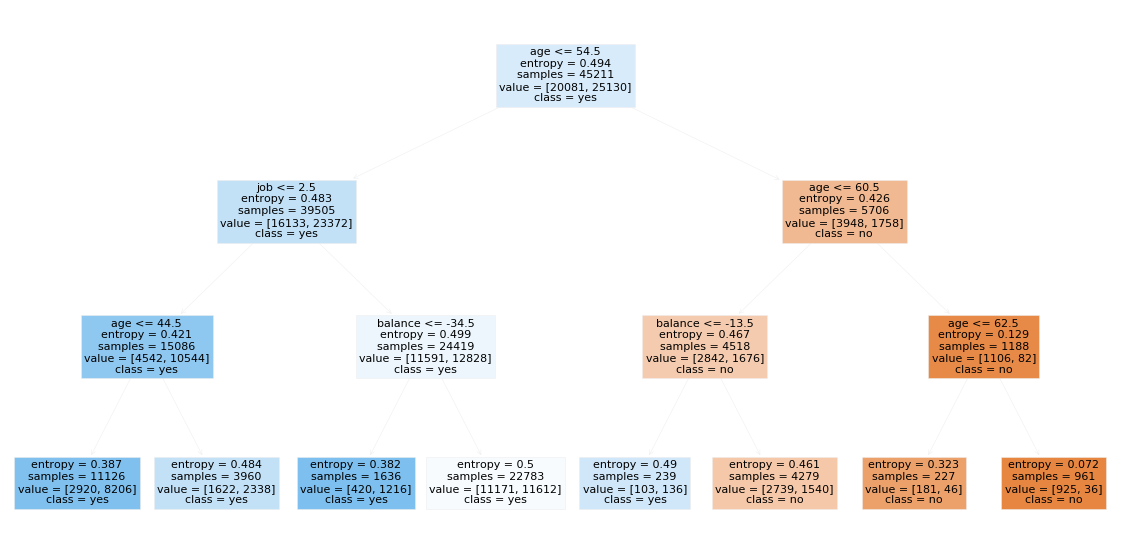

['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']


In [83]:
# Selecionando apenas os campos relacionados ao cliente
df_ex6 = df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan']]
# Preparando os dados
for column in df_ex6.columns:
    # Transformando campos não numéricos em numéricos
    if df_ex6[column].dtype != df_ex6['age'].dtype:
        df_ex6[column] = LabelEncoder().fit_transform(df_ex6[column])
y = df_ex6['housing']
X = df_ex6.drop(columns=['housing'])
display(X.head(5))
model = DecisionTreeClassifier(max_depth=3)
model.fit(X, y)
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns,
          class_names=LabelEncoder().fit(df['housing']).classes_,
         filled=True)
plt.show()
print(LabelEncoder().fit(df['job']).classes_)

As características mais proeminentes são: possuir mais de 54,5 anos, possuir profissão de administrador, 'blue-collar' ou empreendedor, e balanço menor que -34,5.